# Energy in Oscillations

## Lab 3A energy plots

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Go to your lab 3A notebook and copy and paste the best parameter values into new variables
amplitude_3a = 0.05933179905343611
omega_3a = 8.074387332608136
offset_3a = -0.0722698702685423
phi_3a = 1.667834911846836
# Store them all in an array like parameters_3a
parameters_3a = [amplitude_3a, omega_3a, offset_3a, phi_3a]

In [102]:
# Copy and paste the function definition for the sin function from the 3A notebook
def sin_fit_fun(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.sin(omega * time + phi) + offset
  return y

In [103]:
# Create a time array
time = np.linspace(0,20,1000)

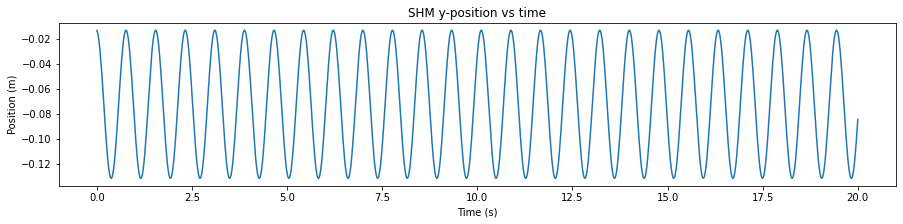

In [104]:
# Now you can get position values from your sin function and the time array
plt.plot(time, sin_fit_fun(parameters_3a, time))
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('SHM y-position vs time')
plt.rcParams["figure.figsize"] = (15,3)

In [105]:
# The potential energy is 0.5*k*(position - offset)**2
# The offset is the equilibrium distance
# The value of k is in lab 3A slides

k = 3.26

# Find the potential energy

PE = 0.5*k*((sin_fit_fun(parameters_3a, time) - offset_3a)**2)

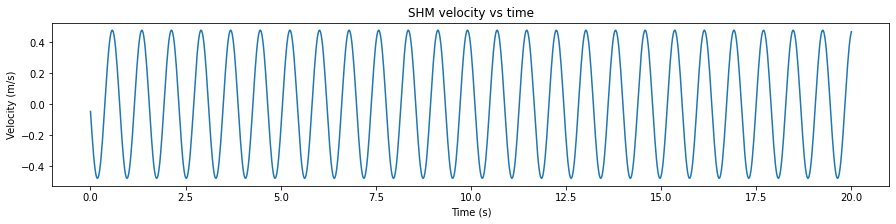

In [106]:
# Copy and paste the function definition for finding velocity in Lab 3A
# The differentiation can be done by hand and then typed into code
# vel_fit is the velocity as a function of time
vel_fit = parameters_3a[0]*parameters_3a[1]*np.cos(parameters_3a[1]*time+parameters_3a[3])
# Plot the velocity vs time
plt.plot(time, vel_fit, label='Velocity Best Fit')

# Axis labels
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# Title
plt.title('SHM velocity vs time')
plt.rcParams["figure.figsize"] = (15,3)

In [107]:
# Now you can get velocity values from your velocity function and the time array

In [108]:
# The kinetic energy is 0.5*m*(velocity)**2
# The value of m is in lab 3A slides
m = 0.05
# from lab 3A
# Find the kinetic energy
KE = 0.5*m*((vel_fit)**2)

In [109]:
# Total energy = Potential energy + Kinetic energy
E = PE + KE

Text(0, 0.5, 'energy (J)')

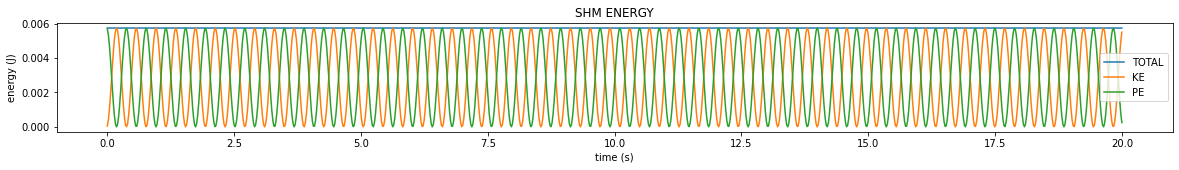

In [132]:
# Plot the potential energy, kinetic energy and the total energy VS time
# Add axes labels
# Add a legend
plt.plot(time, E, label = 'TOTAL')
plt.rcParams["figure.figsize"] = (20,2)
plt.plot(time, KE, label = 'KE')
plt.rcParams["figure.figsize"] = (20,2)
plt.plot(time, PE, label = 'PE')
plt.rcParams["figure.figsize"] = (20,2)
plt.legend()
plt.title('SHM ENERGY')
plt.xlabel('time (s)')
plt.ylabel('energy (J)')

## Lab 3B energy plots

In [117]:
# Go to your lab 3B notebook and copy and paste the best parameter values into new variables
amplitude_3b = 0.08410489576239659
omega_3b = 1.729140049341836
offset_3b = 0.012199124929234858
phi_3b = -0.308664856182118
tau_3b = 9.74634341245837  
# Store them all in an array like parameters_3b
parameters_3b = [amplitude_3b, omega_3b, offset_3b, phi_3b, tau_3b]

In [118]:
# Copy and paste the function definition for the exponetially decaying cos function from the 3B notebook
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [119]:
# Now you can get position values from your exponetially decaying cos function and the time array
# You do not need to create another time array - you can use the same one from the 3A section above

In [126]:
# The potential energy is 0.5*k*(position - offset)**2
# The offset is the equilibrium distance
# The value of k is in lab 3B slides
kb = 1.4
# Find the potential energy
PE_B = 0.5*kb*(cos_fit_fun_damped(parameters_3b, time) - offset_3b)**2.

In [122]:
# Copy and paste the function definition for finding velocity in Lab 3B
def velocity_fit(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  v = ( -a * np.exp(-time / tau) * (tau * omega * np.sin(omega * time + phi) + np.cos(omega * time + phi)) ) / tau
  return v

In [128]:
# Now you can get velocity values from your velocity function and the time array

In [129]:
# The kinetic energy is 0.5*m*(velocity)**2
# The value of m is in lab 3B slides
mb = 0.5
# Find the kinetic energy
KE_B = 0.5*mb*(velocity_fit(parameters_3b, time))**2.

In [130]:
# Total energy = Potential energy + Kinetic energy
E_B = KE_B + PE_B

Text(0, 0.5, 'energy (J)')

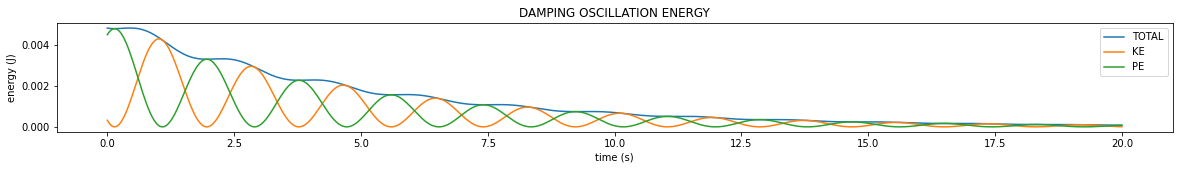

In [133]:
# Plot the potential energy, kinetic energy and the total energy VS time
# Add axes labels
# Add a legend
plt.plot(time, E_B, label = 'TOTAL')
plt.rcParams["figure.figsize"] = (20,2)
plt.plot(time, KE_B, label = 'KE')
plt.rcParams["figure.figsize"] = (20,2)
plt.plot(time, PE_B, label = 'PE')
plt.rcParams["figure.figsize"] = (20,2)
plt.legend()
plt.title('DAMPING OSCILLATION ENERGY')
plt.xlabel('time (s)')
plt.ylabel('energy (J)')

## Pendulum tracker energy (per unit mass) plots

Before we import the csv file from tracker, please open the csv file and delete the first 3 rows as well as the last row.

In [ ]:
from google.colab import drive
drive.mount('drive')

# Read in the csv file
read_in_array = np.loadtxt('/content/drive/MyDrive/2021-2022/22Winter/4AL/Python References/2.15 Energy Plots/11 y-position data.csv',delimiter=",") 
read_in_array2 = np.loadtxt('/content/drive/MyDrive/2021-2022/22Winter/4AL/Python References/2.15 Energy Plots/11 x-velocity data.csv',delimiter=",") 

In [166]:
# Separate out the time, y position and velocity values
t = read_in_array[:,0]
y = read_in_array[:,1]
velocity = read_in_array2[:,1]

In [171]:
# Use the formula from slide 10 to find the potential energy per units mass
L = 0.565
unitPE = 9.8*(L - y)

In [172]:
# Find the kinetic energy per unit mass
unitKE = 0.5 * ((velocity)**2.)

In [173]:
# Total energy = Potential energy + Kinetic energy
unitE = unitPE + unitKE

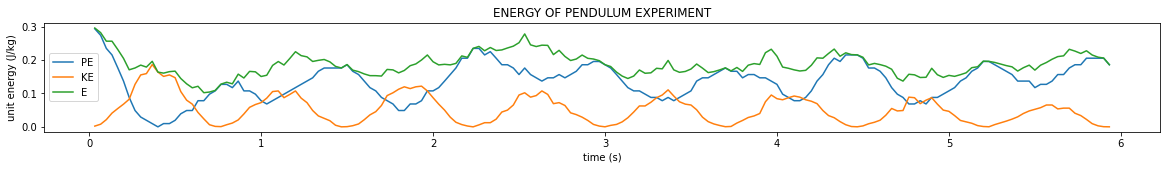

In [175]:
# Plot the potential energy, kinetic energy and the total energy VS time
# Add axes labels
# Add a legend
plt.plot(t, unitPE, label = 'PE')
plt.plot(t, unitKE, label = 'KE')
plt.plot(t, unitE, label = 'E')
plt.xlabel('time (s)')
plt.ylabel('unit energy (J/kg)')
plt.title('ENERGY OF PENDULUM EXPERIMENT')
plt.legend()